In [109]:
from sklearn.cluster import KMeans 

import pandas as pd 

from sklearn.preprocessing import MinMaxScaler 

from matplotlib import pyplot as plt 

In [110]:
df = pd.read_csv('Airline.csv')

In [111]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [112]:
df.shape

(25976, 25)

In [113]:
## Trasformando o Customer Type
unique_types = list(set(df['Customer Type'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Customer Type'] = df['Customer Type'].map(mapping)

Dicionário de mapeamento: {'Loyal Customer': 0, 'disloyal Customer': 1}


Text(0, 0.5, 'Flight Distance')

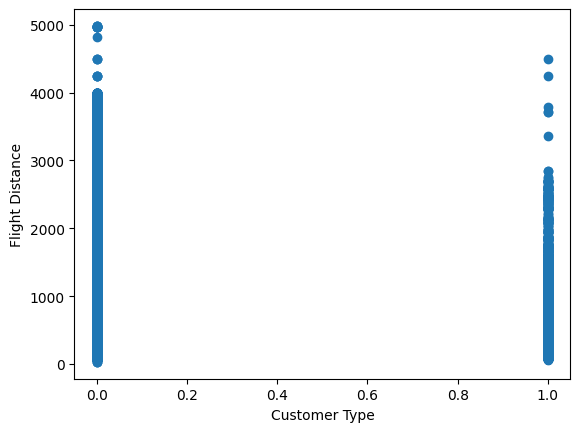

In [114]:
# Gráfico de  Dispersão Customer Type x Flight Distance

plt.scatter(df['Customer Type'],df['Flight Distance']) 

plt.xlabel("Customer Type") 

plt.ylabel('Flight Distance') 

Text(0, 0.5, 'Flight Distance')

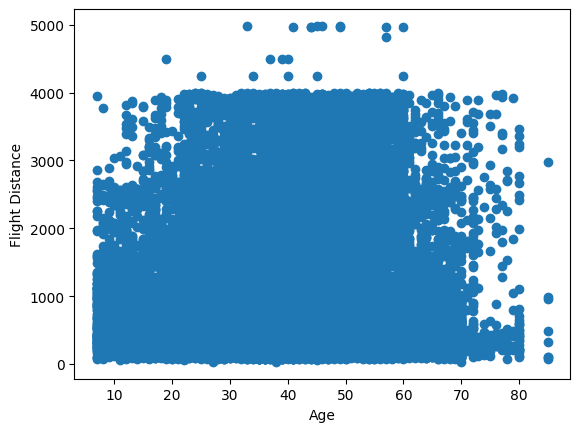

In [115]:
# Gráfico de  Dispersão Age x Flight Distance

plt.scatter(df['Age'],df['Flight Distance']) 

plt.xlabel("Age") 

plt.ylabel('Flight Distance') 

Text(0, 0.5, 'Flight Distance')

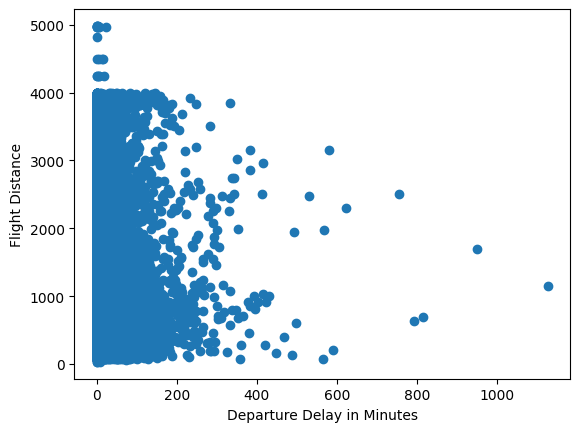

In [116]:
# Gráfico de  Dispersão Departure Delay in Minutes x Flight Distance

plt.scatter(df['Departure Delay in Minutes'],df['Flight Distance']) 

plt.xlabel("Departure Delay in Minutes") 

plt.ylabel('Flight Distance') 

Text(0, 0.5, 'Flight Distance')

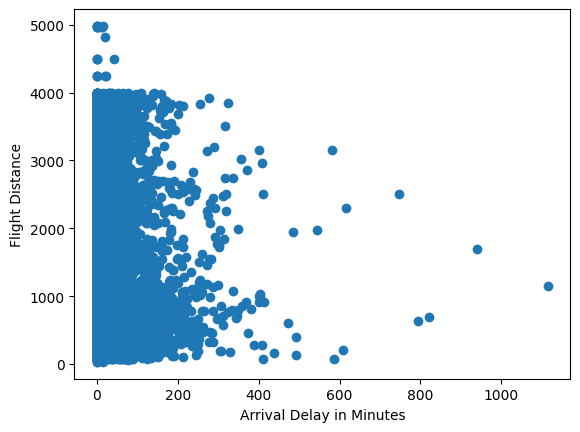

In [117]:
# Gráfico de  Dispersão Arrival Delay in Minutes x Flight Distance

plt.scatter(df['Arrival Delay in Minutes'],df['Flight Distance']) 

plt.xlabel("Arrival Delay in Minutes") 

plt.ylabel('Flight Distance') 

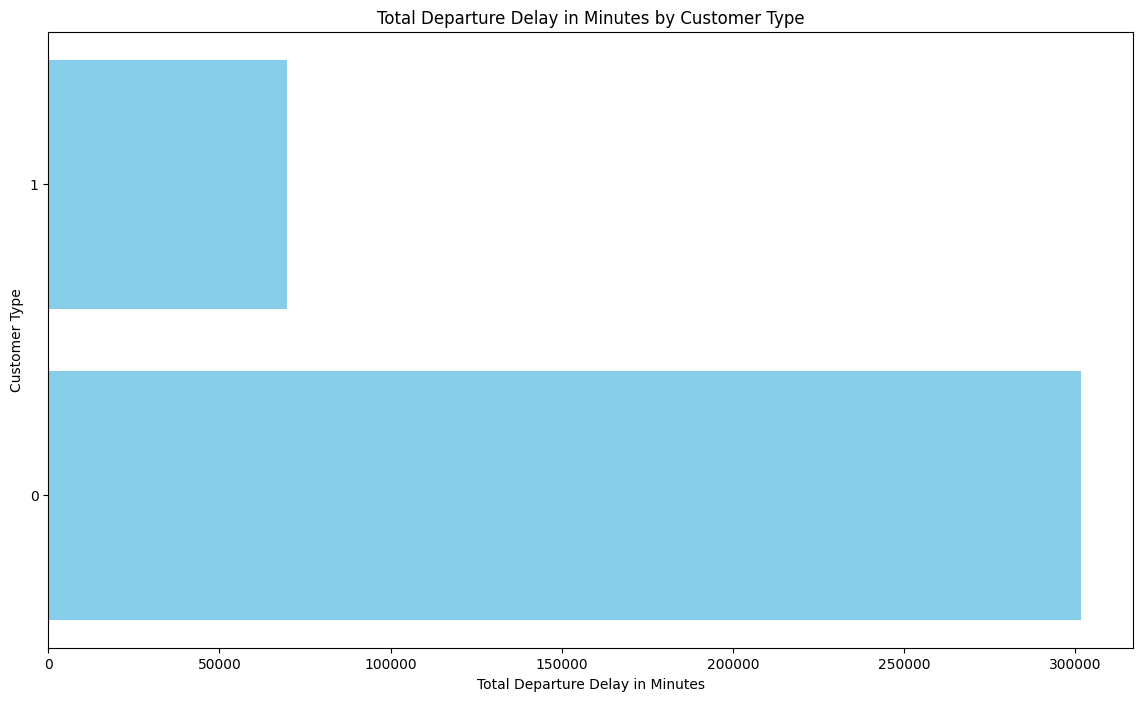

In [118]:

grouped_data = df.groupby('Customer Type')['Departure Delay in Minutes'].sum().reset_index()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(14, 8))
plt.barh(grouped_data['Customer Type'].astype(str), grouped_data['Departure Delay in Minutes'], color='skyblue')
plt.ylabel('Customer Type')
plt.xlabel('Total Departure Delay in Minutes')
plt.title('Total Departure Delay in Minutes by Customer Type')
plt.show()

In [119]:
# WCSSE 

sse = [] 

k_rng = range(1,10) 

for k in k_rng: 

    km = KMeans(n_clusters=k) 

    km.fit(df[['Flight Distance','Age']]) 

    sse.append(km.inertia_) 

print(sse) 

[25912629314.530457, 6204169886.543911, 3099793569.9268374, 1689249180.651628, 997483274.3051986, 744262545.5440054, 541088221.5972786, 419680759.26114184, 344339819.7973361]


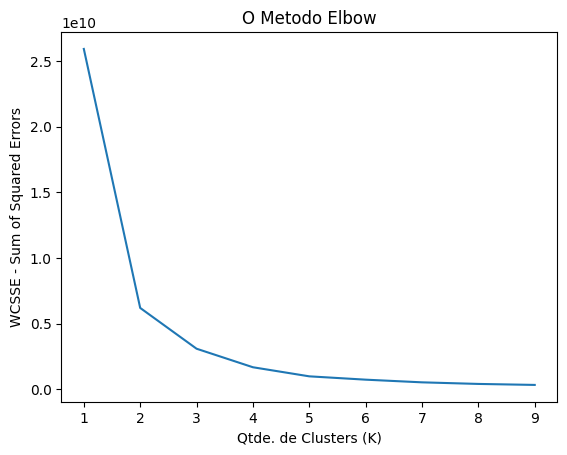

In [120]:
plt.title('O Metodo Elbow') 

plt.xlabel('Qtde. de Clusters (K)') 

plt.ylabel('WCSSE - Sum of Squared Errors') # Within Cluster Sum of Squares 

plt.plot(k_rng,sse) 

In [121]:
km = KMeans(n_clusters=3) #  

In [122]:
y_predicted = km.fit_predict(df[['Age','Flight Distance']]) 

y_predicted 

array([0, 2, 0, ..., 0, 1, 0], dtype=int32)

In [123]:
km.cluster_centers_  

array([[  38.56275054,  542.98791243],
       [  40.24203028, 1689.21228851],
       [  42.91847564, 3068.10733237]])

In [124]:
df['cluster']=y_predicted 

df.head() 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,cluster
0,0,19556,Female,0,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,0
1,1,90035,Female,0,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,2
2,2,12360,Male,1,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0
3,3,77959,Male,0,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,2
4,4,36875,Female,0,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,1


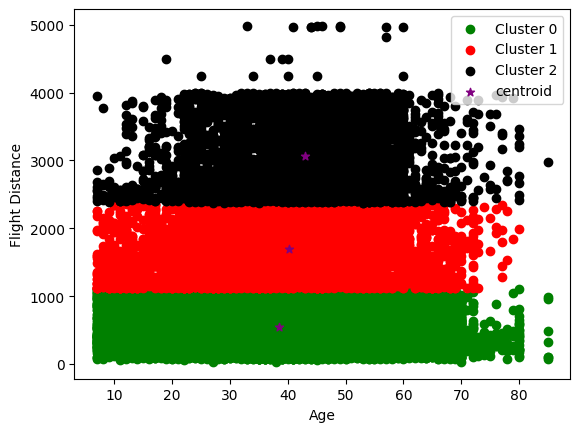

In [125]:
df1 = df[df.cluster==0] 

df2 = df[df.cluster==1] 

df3 = df[df.cluster==2] 

plt.scatter(df1['Age'],df1['Flight Distance'] ,color='green',label='Cluster 0') 

plt.scatter(df2['Age'],df2['Flight Distance'] ,color='red',label='Cluster 1') 

plt.scatter(df3['Age'],df3['Flight Distance'] ,color='black',label='Cluster 2') 

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') 

plt.xlabel("Age") 

plt.ylabel('Flight Distance') 

plt.legend() 